In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')



In [17]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
num_samples = 5
selected_rows = train_data.sample(num_samples)

In [20]:
labels = selected_rows['label']
pixels = selected_rows.drop(columns=['label'])

In [21]:
images = pixels.values.reshape(-1, 28, 28)

In [22]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [ ]:
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(images[i], cmap='copper')
    plt.title(f"Label: {labels.iloc[i]}")
    plt.axis('off')
plt.show()

In [3]:
X_train = train_data.drop('label', axis=1).values.astype('float32')
y_train = train_data['label'].values

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) / 255.0

In [5]:
X_train.shape

(42000, 28, 28, 1)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train)


In [7]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [8]:
batch_size = 64
epochs = 15

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val))

Epoch 1/15
590/590 [==============================] - 31s 50ms/step - loss: 0.5764 - accuracy: 0.8167 - val_loss: 0.0942 - val_accuracy: 0.9695
Epoch 2/15
590/590 [==============================] - 27s 47ms/step - loss: 0.2319 - accuracy: 0.9303 - val_loss: 0.0593 - val_accuracy: 0.9824
Epoch 3/15
590/590 [==============================] - 28s 47ms/step - loss: 0.1718 - accuracy: 0.9482 - val_loss: 0.0448 - val_accuracy: 0.9874
Epoch 4/15
590/590 [==============================] - 27s 45ms/step - loss: 0.1445 - accuracy: 0.9569 - val_loss: 0.0470 - val_accuracy: 0.9862
Epoch 5/15
590/590 [==============================] - 27s 46ms/step - loss: 0.1260 - accuracy: 0.9621 - val_loss: 0.0354 - val_accuracy: 0.9898
Epoch 6/15
590/590 [==============================] - 29s 50ms/step - loss: 0.1132 - accuracy: 0.9666 - val_loss: 0.0353 - val_accuracy: 0.9902
Epoch 7/15
590/590 [==============================] - 28s 47ms/step - loss: 0.1011 - accuracy: 0.9694 - val_loss: 0.0349 - val_accuracy:

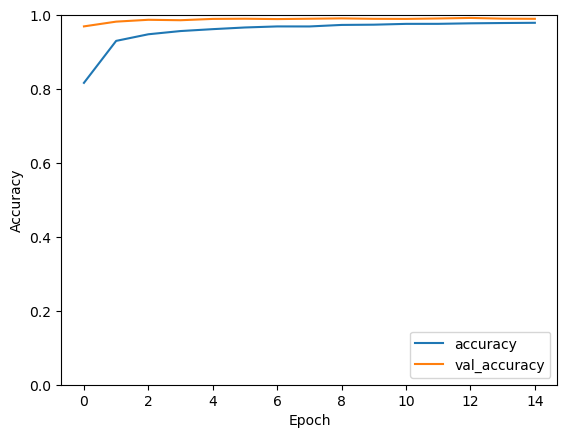

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Accuracy Curves')

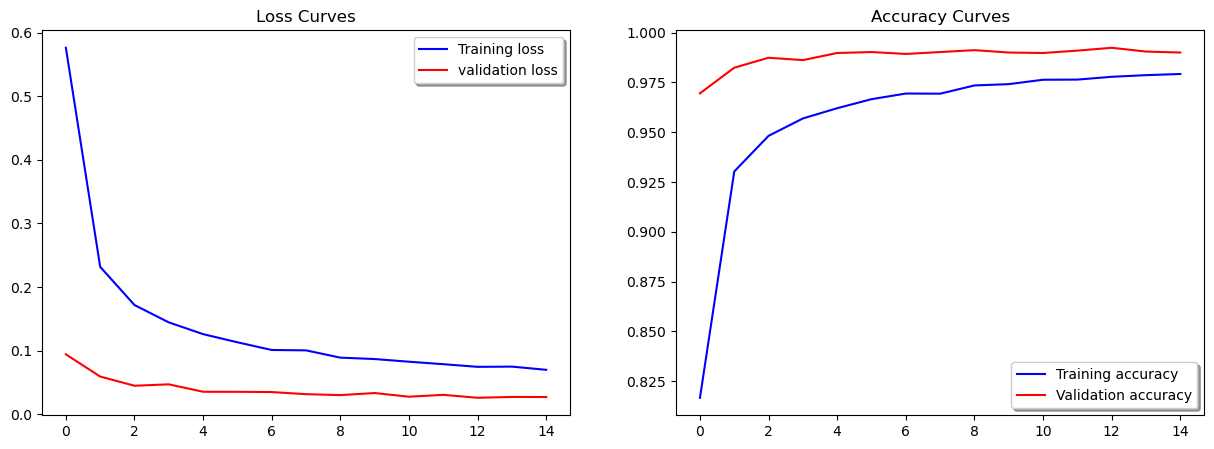

In [25]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set_title('Loss Curves')

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Accuracy Curves')

In [31]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

132/132 [==============================] - 1s 5ms/step


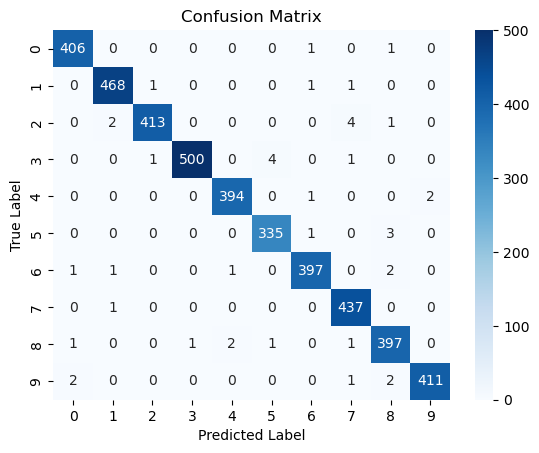

In [32]:
y_pred = model.predict(X_val).argmax(axis=1)
cm = confusion_matrix(y_val, y_pred)

sns.heatmap(cm, annot=True, fmt='g',cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [10]:
model.evaluate(X_val,y_val)

132/132 [==============================] - 1s 6ms/step - loss: 0.0271 - accuracy: 0.9900


[0.027082592248916626, 0.9900000095367432]

In [11]:
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_test = test_data.values.astype('float32').reshape(test_data.shape[0], 28, 28, 1) / 255.0
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


875/875 [==============================] - 5s 5ms/step


In [13]:
len(predicted_labels)

28000

In [14]:
submission_df = pd.DataFrame({
    "ImageId": np.arange(1, len(predicted_labels) + 1),  # Adding 1 to start from 1
    "Label": predicted_labels
})

# Save the submission DataFrame to a CSV file


In [33]:
submission_df.to_csv('submission.csv', index=False)

In [16]:
submission_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
